### Example of expected power module usage

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import datetime as dt
import pytz
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(r'C:\Users\abbey\OneDrive\Documents\Projects\WindEnergy\wind-energy-analytics')
sys.path.append(r'C:\Users\abbey\OneDrive\Documents\Projects\WindEnergy\wind-energy-analytics\scada_data_analysis')
from scipy.interpolate import interp1d
from utils.binning_function import binning_func
from modules.power_curve_preprocessing import PowerCurveFiltering
from modules.expected_power import ExpectedPower

### Load Data

In [2]:
# df = pd.read_csv('..\datasets\la-haute-borne-data-2017-2020.zip', sep=';')

In [2]:
train_df = pd.read_csv(r'../datasets/training_data.zip')   
test_df = pd.read_csv(r'../datasets/test_data.zip')

### Data Exploration

In [3]:
train_df.shape

(152548, 138)

In [4]:
test_df.shape

(65040, 138)

### Data Processing

In [6]:
df['Date_time'] = pd.to_datetime(df['Date_time'])

##### Create training data and test data

In [101]:
# train_df = df[df['Date_time'] <= dt.datetime(2017, 9, 22, tzinfo=pytz.utc)]

In [105]:
# train_index = train_df.index

In [110]:
# test_index = list(set(df.index).difference(set(train_index)))

In [111]:
# assert len(df.index) == len(train_index) + len(test_index)

In [112]:
# test_df = df.loc[test_index, :]

In [114]:
# train_df.reset_index(drop=True, inplace=True)
# test_df.reset_index(drop=True, inplace=True)

### Save Data 

In [116]:
# train_df.to_csv(r'..\datasets\training_data.csv', index=False)
# test_df.to_csv(r'..\datasets\test_data.csv', index=False)

### Test Expected Power Module

In [5]:
power_model = ExpectedPower(turbine_label='Wind_turbine_name', windspeed_label='Ws_avg', power_label='P_avg', method='binning', kind='cubic')

In [6]:
%%time
power_model.fit(train_df)

CPU times: total: 5.02 s
Wall time: 5.01 s


In [7]:
%%time
pred_df = power_model.predict(test_df)

CPU times: total: 172 ms
Wall time: 170 ms


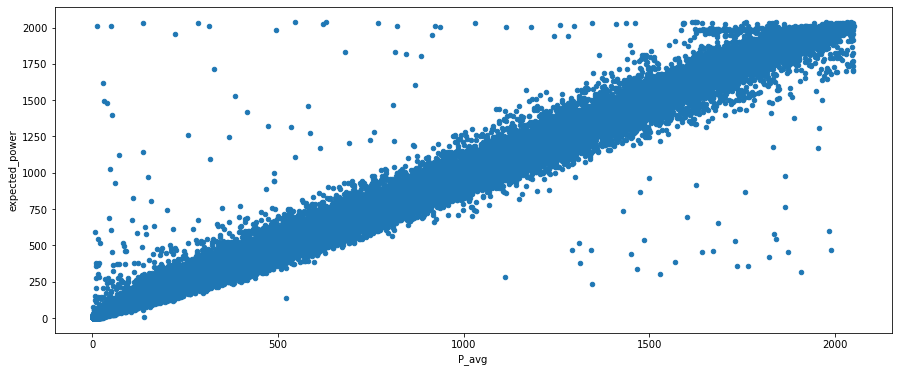

In [8]:
pred_df[pred_df['P_avg'] >=1].plot('P_avg', 'expected_power', kind='scatter', figsize=(15,6));

In [12]:
pred_df['Wind_turbine_name'].unique()

array(['R80736', 'R80721', 'R80790', 'R80711'], dtype=object)

In [9]:
pred_temp = pred_df[pred_df['Wind_turbine_name'] == 'R80721']

C:\Users\abbey\.conda\envs\wea\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ws_avg', ylabel='expected_power'>

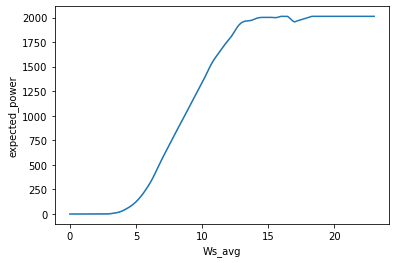

In [11]:
sns.lineplot(pred_temp['Ws_avg'], pred_temp['expected_power'])

C:\Users\abbey\.conda\envs\wea\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ws_avg', ylabel='expected_power'>

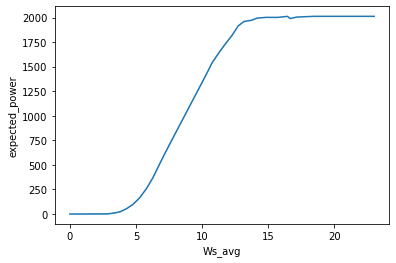

In [10]:
#linear
sns.lineplot(pred_temp['Ws_avg'], pred_temp['expected_power'])

In [11]:
y_exp = pred_df['expected_power']
y_true = pred_df['P_avg']

In [12]:
x = range(len(y_exp))

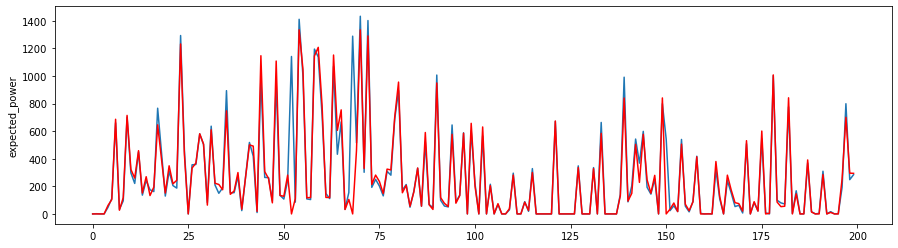

In [15]:
plt.figure(figsize=(15,4))
sns.lineplot(x=x[:200],y=y_exp[:200]);
sns.lineplot(x=x[:200],y=y_true[:200], color='red');

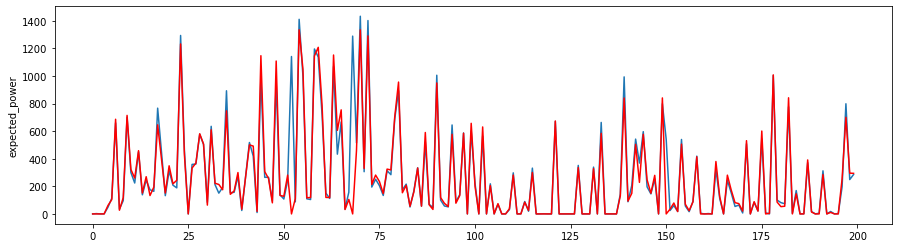

In [13]:
#linear
plt.figure(figsize=(15,4))
sns.lineplot(x=x[:200],y=y_exp[:200]);
sns.lineplot(x=x[:200],y=y_true[:200], color='red');

In [14]:
# linear
np.sum(pred_df.expected_power - pred_df.P_avg)/np.sum(pred_df.expected_power)*100

0.8534465273562923

In [17]:
# quad
np.sum(pred_df.expected_power - pred_df.P_avg)/np.sum(pred_df.expected_power)*100

0.6344103282598241

In [18]:
# cubic
np.sum(pred_df.expected_power - pred_df.P_avg)/np.sum(pred_df.expected_power)*100

0.6344103282598241

In [15]:
# linear
np.mean(abs(pred_df.expected_power - pred_df.P_avg))

45.175626360160294

In [20]:
# quad
np.mean(abs(pred_df.expected_power - pred_df.P_avg))

45.41764104631735

In [21]:
# cubic
np.mean(abs(pred_df.expected_power - pred_df.P_avg))

45.41764104631735